## Finding out whether individual statisitcs of a professional League of Legends player contribute to the outcome of a game.

### H0: There are no individual statisitcs for professional League of Legends players that significantly contribute towards the outcome of a game.

### H1: There exist individual statistics for professional League of Legends players that significantly contribute towards the outcome of a game.

In [1]:
import pandas as pd

In [2]:
# import csv with all the complete rows of data, and only the columns we need
df = pd.read_csv('oe_clean.csv')
df

,gameid,league,playoffs,game,participantid,side,position,playername,gamelength,result,...,wardsplaced,wardskilled,controlwardsbought,visionscore,totalgold,earned gpm,earnedgoldshare,total cs,minionkills,monsterkills
0,TRLH3/33,EU LCS,0,1.0,3,Blue,mid,xPeke,1924,1,...,12.0,3.0,0.0,0.0,14564.0,330.6861,0.267565,276.0,247.0,29.0
1,TRLH3/33,EU LCS,0,1.0,1,Blue,top,sOAZ,1924,1,...,13.0,0.0,0.0,0.0,11499.0,235.1040,0.190230,209.0,209.0,0.0
2,TRLH3/33,EU LCS,0,1.0,2,Blue,jng,Cyanide,1924,1,...,12.0,0.0,1.0,0.0,10113.0,191.8815,0.155260,115.0,24.0,91.0
3,TRLH3/33,EU LCS,0,1.0,5,Blue,sup,YellOwStaR,1924,1,...,38.0,2.0,3.0,0.0,9045.0,158.5759,0.128312,11.0,11.0,0.0
4,TRLH3/33,EU LCS,0,1.0,6,Red,top,Darien,1924,0,...,11.0,3.0,1.0,0.0,10050.0,189.9168,0.239525,232.0,213.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665025,LOLTMNT02_181861,HW,0,5.0,10,Red,sup,XERSUS,1803,1,...,58.0,21.0,18.0,116.0,7686.0,124.1930,0.100351,50.0,50.0,0.0
665026,LOLTMNT02_181861,HW,0,5.0,3,Blue,mid,many,1803,0,...,13.0,6.0,4.0,34.0,10098.0,204.4592,0.209556,228.0,228.0,0.0
665027,LOLTMNT02_181861,HW,0,5.0,8,Red,mid,Phantomles,1803,1,...,8.0,5.0,4.0,23.0,13236.0,308.8852,0.249575,247.0,246.0,1.0
665028,LOLTMNT02_181861,HW,0,5.0,9,Red,bot,raining,1803,1,...,19.0,11.0,8.0,36.0,12650.0,289.3844,0.233819,273.0,267.0,6.0


In [3]:
# check the columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665030 entries, 0 to 665029
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   gameid                    665030 non-null  object 
 1   league                    665030 non-null  object 
 2   playoffs                  665030 non-null  int64  
 3   game                      665030 non-null  float64
 4   participantid             665030 non-null  int64  
 5   side                      665030 non-null  object 
 6   position                  665030 non-null  object 
 7   playername                665030 non-null  object 
 8   gamelength                665030 non-null  int64  
 9   result                    665030 non-null  int64  
 10  kills                     665030 non-null  int64  
 11  deaths                    665030 non-null  int64  
 12  assists                   665030 non-null  int64  
 13  teamkills                 665030 non-null  i

In [4]:
# filter by tier 1 leagues only for better quality data
tier1 = ['LCS', 'LEC', 'LPL', 'LCK']
tier1_df = df[df['league'].isin(tier1)]
tier1_df

,gameid,league,playoffs,game,participantid,side,position,playername,gamelength,result,...,wardsplaced,wardskilled,controlwardsbought,visionscore,totalgold,earned gpm,earnedgoldshare,total cs,minionkills,monsterkills
24802,TRLH3/1001300011,LEC,0,1.0,5,Blue,sup,G0DFRED,2322,0,...,50.0,10.0,6.0,0.0,6362.0,42.5323,0.053141,29.0,27.0,2.0
24803,TRLH3/1001300011,LEC,0,1.0,2,Blue,jng,Fr3deric,2322,0,...,34.0,20.0,3.0,0.0,9408.0,121.2403,0.151469,124.0,43.0,81.0
24804,TRLH3/1001300011,LEC,0,1.0,3,Blue,mid,Pepiinero,2322,0,...,13.0,9.0,1.0,0.0,13582.0,229.0956,0.286210,382.0,354.0,28.0
24805,TRLH3/1001300011,LEC,0,1.0,4,Blue,bot,Adryh,2322,0,...,5.0,5.0,0.0,0.0,12222.0,193.9535,0.242307,313.0,296.0,17.0
24806,TRLH3/1001300011,LEC,0,1.0,6,Red,top,Steve,2322,1,...,23.0,2.0,3.0,0.0,14924.0,263.7726,0.217376,272.0,249.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655908,LOLTMNT03_147405,LCK,1,5.0,5,Blue,sup,Lehends,2291,0,...,92.0,17.0,28.0,149.0,7826.0,75.3470,0.080323,32.0,32.0,0.0
655909,LOLTMNT03_147405,LCK,1,5.0,8,Red,mid,Zeka,2291,1,...,18.0,15.0,7.0,63.0,16193.0,294.4740,0.241449,353.0,310.0,43.0
655910,LOLTMNT03_147405,LCK,1,5.0,7,Red,jng,Peanut,2291,1,...,14.0,22.0,13.0,82.0,13911.0,234.7097,0.192445,244.0,28.0,216.0
655911,LOLTMNT03_147405,LCK,1,5.0,9,Red,bot,Viper,2291,1,...,17.0,8.0,5.0,65.0,16848.0,311.6281,0.255515,361.0,332.0,29.0


In [5]:
# filter out players with less than 50 games played
player_counts = tier1_df['playername'].value_counts()
players_to_keep = player_counts[player_counts >= 50].index
tier1_df = tier1_df[tier1_df['playername'].isin(players_to_keep)]
tier1_df
df = tier1_df.reset_index(drop=True)
df

,gameid,league,playoffs,game,participantid,side,position,playername,gamelength,result,...,wardsplaced,wardskilled,controlwardsbought,visionscore,totalgold,earned gpm,earnedgoldshare,total cs,minionkills,monsterkills
0,TRLH3/1001300011,LEC,0,1.0,8,Red,mid,Nukeduck,2322,1,...,12.0,7.0,2.0,0.0,16016.0,291.9897,0.240629,373.0,345.0,28.0
1,TRLH3/1001300011,LEC,0,1.0,7,Red,jng,Jankos,2322,1,...,40.0,15.0,5.0,0.0,12112.0,191.1111,0.157497,113.0,34.0,79.0
2,TRLH3/1001300011,LEC,0,1.0,10,Red,sup,Vander,2322,1,...,63.0,16.0,10.0,0.0,10730.0,155.4005,0.128068,59.0,59.0,0.0
3,TRLH3/1001300015,LEC,0,2.0,8,Red,mid,Nukeduck,1987,1,...,5.0,2.0,3.0,0.0,13022.0,270.0453,0.204020,214.0,209.0,5.0
4,TRLH3/1001300015,LEC,0,2.0,10,Red,sup,Vander,1987,1,...,44.0,7.0,7.0,0.0,9846.0,174.1419,0.131562,57.0,56.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71036,LOLTMNT03_147405,LCK,1,5.0,5,Blue,sup,Lehends,2291,0,...,92.0,17.0,28.0,149.0,7826.0,75.3470,0.080323,32.0,32.0,0.0
71037,LOLTMNT03_147405,LCK,1,5.0,8,Red,mid,Zeka,2291,1,...,18.0,15.0,7.0,63.0,16193.0,294.4740,0.241449,353.0,310.0,43.0
71038,LOLTMNT03_147405,LCK,1,5.0,7,Red,jng,Peanut,2291,1,...,14.0,22.0,13.0,82.0,13911.0,234.7097,0.192445,244.0,28.0,216.0
71039,LOLTMNT03_147405,LCK,1,5.0,9,Red,bot,Viper,2291,1,...,17.0,8.0,5.0,65.0,16848.0,311.6281,0.255515,361.0,332.0,29.0


In [6]:
# select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# calculate the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

correlation_matrix

,playoffs,game,participantid,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,...,wardsplaced,wardskilled,controlwardsbought,visionscore,totalgold,earned gpm,earnedgoldshare,total cs,minionkills,monsterkills
playoffs,1.000000,0.380124,0.000499,-0.058614,-0.003108,0.053271,0.078013,0.075639,0.100014,0.104123,...,-0.028949,-0.041842,-0.030426,0.035321,-0.029548,0.009577,-0.001137,-0.034102,-0.033709,0.005497
game,0.380124,1.000000,0.001427,0.003585,-0.004517,0.018999,0.032442,0.030673,0.036036,0.042429,...,0.018754,0.013871,0.007214,-0.012617,0.001930,-0.000059,-0.003032,-0.009990,-0.005146,-0.009164
participantid,0.000499,0.001427,1.000000,0.000159,-0.057317,-0.078256,0.014121,0.050841,-0.035387,0.034954,...,0.268143,0.082288,0.180371,0.176520,-0.136638,-0.182303,-0.174351,-0.192791,-0.093043,-0.191139
gamelength,-0.058614,0.003585,0.000159,1.000000,-0.007879,0.077578,0.119358,0.152665,0.142270,0.161735,...,0.320638,0.449078,0.276065,0.248729,0.630461,-0.000132,-0.000234,0.342597,0.263849,0.115218
result,-0.003108,-0.004517,-0.057317,-0.007879,1.000000,0.369112,-0.502505,0.558478,0.680914,-0.681419,...,0.009659,0.070298,-0.011156,0.076779,0.270371,0.380109,-0.000729,0.040685,0.010903,0.060232
kills,0.053271,0.018999,-0.078256,0.077578,0.369112,1.000000,-0.178691,0.112343,0.541752,-0.116168,...,-0.278577,0.026827,-0.280156,-0.137283,0.585407,0.701899,0.532226,0.411352,0.332493,0.102583
deaths,0.078013,0.032442,0.014121,0.119358,-0.502505,-0.178691,1.000000,-0.128466,-0.157930,0.737804,...,0.088830,-0.038417,0.131701,0.046811,-0.170923,-0.333757,-0.167119,-0.142011,-0.121568,-0.019965
assists,0.075639,0.030673,0.050841,0.152665,0.558478,0.112343,-0.128466,1.000000,0.772997,-0.200402,...,0.265873,0.144268,0.255661,0.279741,0.071817,-0.008181,-0.298412,-0.230960,-0.239901,0.063657
teamkills,0.100014,0.036036,-0.035387,0.142270,0.680914,0.541752,-0.157930,0.772997,1.000000,-0.215159,...,0.036974,0.076684,0.037318,0.123805,0.343745,0.356428,-0.000673,0.044453,0.012017,0.065572
teamdeaths,0.104123,0.042429,0.034954,0.161735,-0.681419,-0.116168,0.737804,-0.200402,-0.215159,1.000000,...,0.019205,-0.022221,0.043162,0.004899,-0.072176,-0.252770,0.000363,-0.012012,-0.000586,-0.023784


In [7]:
# set the threshold for correlation
threshold = 0.8

# find highly correlated pairs of columns
correlation_matrix = numeric_df.corr()

# get the pairs of columns with high correlation
highly_correlated = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated.add(colname)

# drop the columns with high correlation
df = df.drop(columns=highly_correlated)
df

,gameid,league,playoffs,game,participantid,side,position,playername,gamelength,result,...,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wardskilled,controlwardsbought,visionscore,totalgold,earned gpm,monsterkills
0,TRLH3/1001300011,LEC,0,1.0,8,Red,mid,Nukeduck,2322,1,...,0.371049,302.8424,0.0000,12.0,7.0,2.0,0.0,16016.0,291.9897,28.0
1,TRLH3/1001300011,LEC,0,1.0,7,Red,jng,Jankos,2322,1,...,0.119106,622.3256,0.0000,40.0,15.0,5.0,0.0,12112.0,191.1111,79.0
2,TRLH3/1001300011,LEC,0,1.0,10,Red,sup,Vander,2322,1,...,0.061039,426.7700,0.0000,63.0,16.0,10.0,0.0,10730.0,155.4005,0.0
3,TRLH3/1001300015,LEC,0,2.0,8,Red,mid,Nukeduck,1987,1,...,0.236659,553.1354,0.0000,5.0,2.0,3.0,0.0,13022.0,270.0453,5.0
4,TRLH3/1001300015,LEC,0,2.0,10,Red,sup,Vander,1987,1,...,0.059118,546.3412,0.0000,44.0,7.0,7.0,0.0,9846.0,174.1419,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71036,LOLTMNT03_147405,LCK,1,5.0,5,Blue,sup,Lehends,2291,0,...,0.060458,376.6303,482.2785,92.0,17.0,28.0,149.0,7826.0,75.3470,0.0
71037,LOLTMNT03_147405,LCK,1,5.0,8,Red,mid,Zeka,2291,1,...,0.266360,694.5962,1093.5137,18.0,15.0,7.0,63.0,16193.0,294.4740,43.0
71038,LOLTMNT03_147405,LCK,1,5.0,7,Red,jng,Peanut,2291,1,...,0.090105,776.1240,1082.0166,14.0,22.0,13.0,82.0,13911.0,234.7097,216.0
71039,LOLTMNT03_147405,LCK,1,5.0,9,Red,bot,Viper,2291,1,...,0.422562,175.8621,86.6608,17.0,8.0,5.0,65.0,16848.0,311.6281,29.0


In [8]:
# inspect the columns after dropping
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71041 entries, 0 to 71040
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gameid                    71041 non-null  object 
 1   league                    71041 non-null  object 
 2   playoffs                  71041 non-null  int64  
 3   game                      71041 non-null  float64
 4   participantid             71041 non-null  int64  
 5   side                      71041 non-null  object 
 6   position                  71041 non-null  object 
 7   playername                71041 non-null  object 
 8   gamelength                71041 non-null  int64  
 9   result                    71041 non-null  int64  
 10  kills                     71041 non-null  int64  
 11  deaths                    71041 non-null  int64  
 12  assists                   71041 non-null  int64  
 13  teamkills                 71041 non-null  int64  
 14  teamde

In [9]:
# separate the features and target variable
X = df.drop(columns=['gameid','league','playoffs','game','participantid','position','playername','gamelength','result', 'side', 'teamkills','teamdeaths','inhibitors','opp_inhibitors'])
y = df['result']

In [10]:
# inspect X
X

,kills,deaths,assists,ckpm,damagetochampions,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wardskilled,controlwardsbought,visionscore,totalgold,earned gpm,monsterkills
0,3,0,9,0.5168,26966.0,0.371049,302.8424,0.0000,12.0,7.0,2.0,0.0,16016.0,291.9897,28.0
1,2,0,11,0.5168,8656.0,0.119106,622.3256,0.0000,40.0,15.0,5.0,0.0,12112.0,191.1111,79.0
2,2,0,14,0.5168,4436.0,0.061039,426.7700,0.0000,63.0,16.0,10.0,0.0,10730.0,155.4005,0.0
3,8,5,10,1.0569,19003.0,0.236659,553.1354,0.0000,5.0,2.0,3.0,0.0,13022.0,270.0453,5.0
4,1,1,18,1.0569,4747.0,0.059118,546.3412,0.0000,44.0,7.0,7.0,0.0,9846.0,174.1419,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71036,0,6,4,0.4976,3900.0,0.060458,376.6303,482.2785,92.0,17.0,28.0,149.0,7826.0,75.3470,0.0
71037,6,0,8,0.4976,20270.0,0.266360,694.5962,1093.5137,18.0,15.0,7.0,63.0,16193.0,294.4740,43.0
71038,4,1,7,0.4976,6857.0,0.090105,776.1240,1082.0166,14.0,22.0,13.0,82.0,13911.0,234.7097,216.0
71039,3,0,10,0.4976,32157.0,0.422562,175.8621,86.6608,17.0,8.0,5.0,65.0,16848.0,311.6281,29.0


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm 

# train Logistic Regression model for p-values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Add constant to the model (for intercept)
X_train = sm.add_constant(X_train)

# fit a Logistic Regression model
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# display summary
print("\nP-values from Logistic Regression:")
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.216792
         Iterations 8

P-values from Logistic Regression:
                           Logit Regression Results                           
Dep. Variable:                 result   No. Observations:                49728
Model:                          Logit   Df Residuals:                    49712
Method:                           MLE   Df Model:                           15
Date:                Fri, 29 Nov 2024   Pseudo R-squ.:                  0.6871
Time:                        13:38:23   Log-Likelihood:                -10781.
converged:                       True   LL-Null:                       -34459.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.3995      0.1

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix

# add constant to the test set (for intercept)
X_test = sm.add_constant(X_test)

# predict the results on a test set
y_pred = result.predict(X_test)
y_pred_binary = (y_pred >= 0.5).astype(int)  # Convert probabilities to binary predictions

# look at the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_binary)
error_rate = 1 - accuracy

# display the accuracy and error rate
print("\nAccuracy of the Logistic Regression model:", accuracy)
print("Error rate of the Logistic Regression model:", error_rate)

# confusion matrix for additional details
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("\nConfusion Matrix:")
print(conf_matrix)


Accuracy of the Logistic Regression model: 0.912729320133252
Error rate of the Logistic Regression model: 0.08727067986674797

Confusion Matrix:
[[9617  839]
 [1021 9836]]


Given the high accuracy of the model, it is appropriate to utilize it for evaluating the hypothesis.

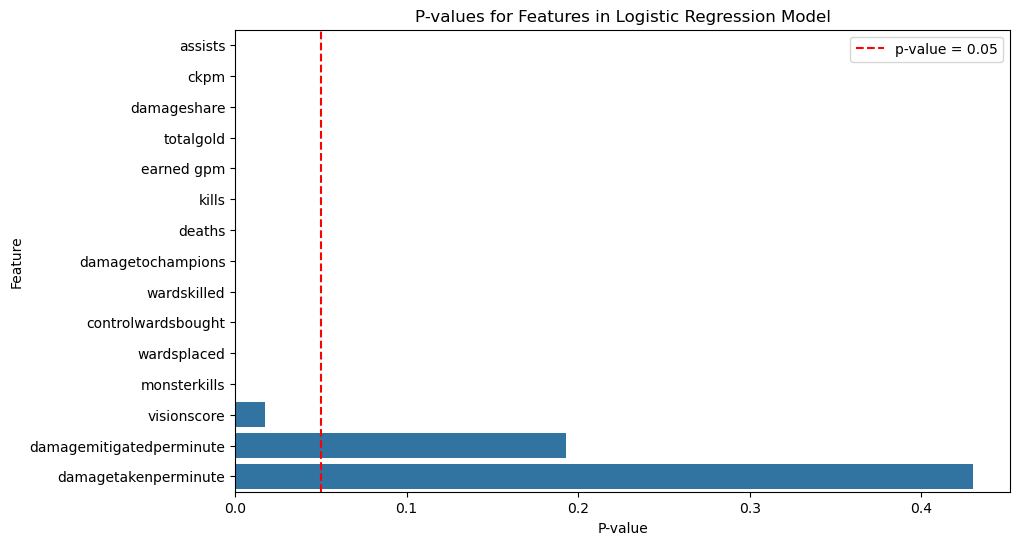

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# extract p-values from the result summary
p_values = result.pvalues[1:]  # exclude constant
features = X_train.columns[1:]  # exclude constant

# create a df for easy plotting
p_values_df = pd.DataFrame({
    'Feature': features,
    'P-value': p_values
}).sort_values(by='P-value', ascending=True)

# plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='P-value', y='Feature', data=p_values_df)

plt.axvline(x=0.05, color='r', linestyle='--', label='p-value = 0.05')
plt.title('P-values for Features in Logistic Regression Model')
plt.xlabel('P-value')
plt.ylabel('Feature')
plt.legend()
plt.show()


## Conclusion:
### Since there exist features with p-values less than 0.05, we reject the null hypothesis. This indicates that individual statistics of professional League of Legends players significantly contribute to the outcome of a game. These statistics are likely important factors in ranking a professional player's performance, as they provide valuable insights into how certain metrics influence a game's result.